# DATA PREP

----

In [1]:
# Preppin Data 2021 W12
import pandas as pd
import numpy as np
import re

In [81]:
#Input Data
df=pd.read_csv("Input/Tourism Input.csv")
df.head()

,id,Series-Measure,Hierarchy-Breakdown,Unit-Detail,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20
0,1103,Total tourist arrivals,Real Sector / Tourism,Tourists,67478,77063,74975,60742,58324,44050,...,59630,13,41,1,1752,7636,9605,21515,35757,96412
1,1104,Tourist bednights,Real Sector / Tourism,Bednights,552287,578472,581848,503007,443824,327385,...,562302.2051,8844.0203,4776.6212,2325.8012,24673.4247,71370.6948,75367.8621,169709.0807,279030.282,623284.397
2,1105,Average stay,Real Sector / Tourism,Days,8.184697,7.506481,7.76056,8.281041,7.609628,7.432122,...,9.4298541854713,9.428593030082,86.847657368888,42.287293761914,14.083004941515,9.3485538100132,9.4824196160074,9.6159959503923,8.877098540146,9.1055876952922
3,1106,Operational bed capacity,Real Sector / Tourism,Beds,22825,23472,23934,24124,23885,23585,...,51001,7690,2978,3078,9821,19263,25328,32600,37378,42194
4,1107,Bednight capacity,Real Sector / Tourism,Beds,707575,657216,741954,723720,740435,707550,...,1581031,230700,92318,92340,304451,597153,759840,1010600,1121340,1308014


In [3]:
# Pivot all of the month fields into a single column. The columns to stay intact are mentioned in id_vars
df=pd.melt(df,id_vars=df.iloc[:,0:4],var_name='month')
df.head()

,id,Series-Measure,Hierarchy-Breakdown,Unit-Detail,month,value
0,1103,Total tourist arrivals,Real Sector / Tourism,Tourists,Jan-10,67478
1,1104,Tourist bednights,Real Sector / Tourism,Bednights,Jan-10,552287
2,1105,Average stay,Real Sector / Tourism,Days,Jan-10,8.184697
3,1106,Operational bed capacity,Real Sector / Tourism,Beds,Jan-10,22825
4,1107,Bednight capacity,Real Sector / Tourism,Beds,Jan-10,707575


In [4]:
#Rename Columns
df.rename(columns={'Series-Measure':'measure','Hierarchy-Breakdown':'breakdown','Unit-Detail':'unit'},inplace=True)
df.head()

,id,measure,breakdown,unit,month,value
0,1103,Total tourist arrivals,Real Sector / Tourism,Tourists,Jan-10,67478
1,1104,Tourist bednights,Real Sector / Tourism,Bednights,Jan-10,552287
2,1105,Average stay,Real Sector / Tourism,Days,Jan-10,8.184697
3,1106,Operational bed capacity,Real Sector / Tourism,Beds,Jan-10,22825
4,1107,Bednight capacity,Real Sector / Tourism,Beds,Jan-10,707575


In [5]:
#Test Example: Remove extraneous characters from numbers
pd.Series(["78%",'na','12.2%']).map(lambda x: re.sub("na|%","",x))

0      78
1        
2    12.2
dtype: object

In [6]:
#Removing na and % from numbers
df['value']=df['value'].map(lambda x: re.sub("%|na","",x))

In [7]:
#Filter out the blanks
df=df[df['value']!=""]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3325 non-null   int64 
 1   measure    3325 non-null   object
 2   breakdown  3325 non-null   object
 3   unit       3325 non-null   object
 4   month      3325 non-null   object
 5   value      3325 non-null   object
dtypes: int64(1), object(5)
memory usage: 181.8+ KB


In [9]:
#ensure that each field has the correct data type
df['unit']=df['unit'].astype('category')
df['month']=pd.to_datetime(df['month'],format='%b-%y')
df['value']=df['value'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3325 non-null   int64         
 1   measure    3325 non-null   object        
 2   breakdown  3325 non-null   object        
 3   unit       3325 non-null   category      
 4   month      3325 non-null   datetime64[ns]
 5   value      3325 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 159.5+ KB


In [10]:
df.head()

,id,measure,breakdown,unit,month,value
0,1103,Total tourist arrivals,Real Sector / Tourism,Tourists,2010-01-01,67478.000000
1,1104,Tourist bednights,Real Sector / Tourism,Bednights,2010-01-01,552287.000000
2,1105,Average stay,Real Sector / Tourism,Days,2010-01-01,8.184697
3,1106,Operational bed capacity,Real Sector / Tourism,Beds,2010-01-01,22825.000000
4,1107,Bednight capacity,Real Sector / Tourism,Beds,2010-01-01,707575.000000


In [11]:
'''
Our goal now is to remove all totals and subtotals from our dataset so that only the lowest 
level of granularity remains. Currently we have Total > Continents > Countries, but we don't 
have data for all countries in a continent, so it's not as simple as just filtering out the 
totals and subtotals. Plus in our Continents level of detail, we also have The Middle East and 
UN passport holders as categories. If you feel confident in your prep skills, this (plus the output) 
should be enough information to go on, but otherwise read on for a breakdown of the steps we need to take:
'''

#Filter our dataset so our Values are referring to Number of Tourists
df=df[df['unit']=='Tourists']
df.head()

,id,measure,breakdown,unit,month,value
0,1103,Total tourist arrivals,Real Sector / Tourism,Tourists,2010-01-01,67478.0
8,1111,Tourist arrivals from Europe,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,51334.0
9,1112,Tourist arrivals from Asia,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,13243.0
10,1113,Tourist arrivals from Africa,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,350.0
11,1114,Tourist arrivals from Americas,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,1289.0


In [12]:
#Filter out Total tourist arrivals
df=df[~df.measure.str.contains('Total')]

In [13]:
df.shape

(1826, 6)

In [14]:
df['measure'].value_counts()

Tourist arrivals from Africa                         132
Tourist arrivals from Russia                         132
Tourist arrivals from France                         132
Tourist arrivals from India                          132
Tourist arrivals from Germany                        132
Tourist arrivals from the United Kingdom             132
Tourist arrivals from Italy                          132
Tourist arrivals from Americas                       132
Tourist arrivals from Oceania                        132
Tourist arrivals from China                          132
Tourist arrivals from Asia                           132
Tourist arrivals from Europe                         132
Tourist arrivals from the Middle East                132
Tourist arrivals - UN passport holders and others     88
Tourist arrivals from United States                   11
Tourist arrivals from Australia                       11
Name: measure, dtype: int64

In [15]:
df[['breakdown','measure']].value_counts()

breakdown                                            measure                                          
Real Sector / Tourism / Tourist arrivals / Europe    Tourist arrivals from the United Kingdom             132
                                                     Tourist arrivals from Russia                         132
                                                     Tourist arrivals from Italy                          132
                                                     Tourist arrivals from Germany                        132
                                                     Tourist arrivals from France                         132
Real Sector / Tourism / Tourist arrivals / Asia      Tourist arrivals from India                          132
                                                     Tourist arrivals from China                          132
Real Sector / Tourism / Tourist arrivals             Tourist arrivals from the Middle East                132
                 

In [16]:
'''
Strategy: We have data at 2 level of granularities mixed up.
1. country level: we have data by continent(breakdown) X country(measure)
2. continent level: we have continents in the (measure) columns

We make separate df for both of these using "breakdown" column.
Now in country level: we don't have data for all countries in a continent
Eg: In country data: it's like Europe->Germany 100 tourists, Europe->France 200 tourists
    But in continent data we have Europe->1000 visitors
    So we have 700 tourists for which we have country as "Unknown"
    
Strategy step 2: 
Aggregate country data to continent level and join it with actual continent data to find out
the number of tourists for which we have do not have country information(700 in our example)
          
After doing this, join this back to country data.
'''

'\nStrategy: We have data at 2 level of granularities mixed up.\n1. country level: we have data by continent(breakdown) X country(measure)\n2. continent level: we have continents in the (measure) columns\n\nWe make separate df for both of these using "breakdown" column.\nNow in country level: we don\'t have data for all countries in a continent\nEg: In country data: it\'s like Europe->Germany 100 tourists, Europe->France 200 tourists\n    But in continent data we have Europe->1000 visitors\n    So we have 700 tourists for which we have country as "Unknown"\n    \nStrategy step 2: \nAggregate country data to continent level and join it with actual continent data to find out\nthe number of tourists for which we have do not have country information(700 in our example)\n          \nAfter doing this, join this back to country data.\n'

In [17]:
#Split our workflow into 2 streams: Continents and Countries
df_continent=df[df['breakdown']=='Real Sector / Tourism / Tourist arrivals']
df_country=df[df['breakdown']!='Real Sector / Tourism / Tourist arrivals']

In [18]:
df_country.head()

,id,measure,breakdown,unit,month,value
15,1118,Tourist arrivals from Germany,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,5890.0
16,1119,Tourist arrivals from Italy,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,12276.0
17,1120,Tourist arrivals from Russia,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,5873.0
18,1121,Tourist arrivals from the United Kingdom,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,8405.0
19,1122,Tourist arrivals from China,Real Sector / Tourism / Tourist arrivals / Asia,Tourists,2010-01-01,6069.0


In [19]:
df_continent.head()

,id,measure,breakdown,unit,month,value
8,1111,Tourist arrivals from Europe,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,51334.0
9,1112,Tourist arrivals from Asia,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,13243.0
10,1113,Tourist arrivals from Africa,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,350.0
11,1114,Tourist arrivals from Americas,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,1289.0
12,1115,Tourist arrivals from Oceania,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,703.0


In [20]:
#Split out the Continent and Country names from the relevant fields
continents = ['Europe','Asia','Africa','Americas','Oceania','Middle East','UN passport holders and others']
countries =['Germany','Italy','Russia','United Kingdom','China','India','France','Australia','United States']

continents_list = '|'.join(continents)
countries_list = '|'.join(countries)

In [21]:
#Test Example: How search function in regex works to find out string from a list of values separated by pipes.
#We can use start() and end() function to get values of tuple positions
re.search("Akshit|Neel|Hi|Bye|Asia", "Tourist arrivals from Asia")

<re.Match object; span=(22, 26), match='Asia'>

In [22]:
def find_string_in_list(string_search:str, list_in_pipes:str):
    position=re.search(list_in_pipes,string_search) #This finds string in the list which has pipes and returns a tuple of position
    if position:
        return string_search[position.start():position.end()]
    else:
        return "NA"

In [23]:
df_continent['continent']=df_continent.measure.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=continents_list))
df_continent

<ipython-input-23-e60fdf55b0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continent['continent']=df_continent.measure.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=continents_list))


,id,measure,breakdown,unit,month,value,continent
8,1111,Tourist arrivals from Europe,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,51334.0,Europe
9,1112,Tourist arrivals from Asia,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,13243.0,Asia
10,1113,Tourist arrivals from Africa,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,350.0,Africa
11,1114,Tourist arrivals from Americas,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,1289.0,Americas
12,1115,Tourist arrivals from Oceania,Real Sector / Tourism / Tourist arrivals,Tourists,2010-01-01,703.0,Oceania
...,...,...,...,...,...,...,...
3678,1113,Tourist arrivals from Africa,Real Sector / Tourism / Tourist arrivals,Tourists,2020-12-01,1996.0,Africa
3679,1114,Tourist arrivals from Americas,Real Sector / Tourism / Tourist arrivals,Tourists,2020-12-01,4929.0,Americas
3680,1115,Tourist arrivals from Oceania,Real Sector / Tourism / Tourist arrivals,Tourists,2020-12-01,728.0,Oceania
3681,1116,Tourist arrivals from the Middle East,Real Sector / Tourism / Tourist arrivals,Tourists,2020-12-01,4557.0,Middle East


In [24]:
df_country['continent']=df_country.breakdown.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=continents_list))
df_country['country']=df_country.measure.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=countries_list))
df_country

<ipython-input-24-c3926ac886f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['continent']=df_country.breakdown.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=continents_list))
<ipython-input-24-c3926ac886f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['country']=df_country.measure.apply(lambda x:find_string_in_list(string_search=x,list_in_pipes=countries_list))


,id,measure,breakdown,unit,month,value,continent,country
15,1118,Tourist arrivals from Germany,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,5890.0,Europe,Germany
16,1119,Tourist arrivals from Italy,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,12276.0,Europe,Italy
17,1120,Tourist arrivals from Russia,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,5873.0,Europe,Russia
18,1121,Tourist arrivals from the United Kingdom,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2010-01-01,8405.0,Europe,United Kingdom
19,1122,Tourist arrivals from China,Real Sector / Tourism / Tourist arrivals / Asia,Tourists,2010-01-01,6069.0,Asia,China
...,...,...,...,...,...,...,...,...
3687,1122,Tourist arrivals from China,Real Sector / Tourism / Tourist arrivals / Asia,Tourists,2020-12-01,171.0,Asia,China
3688,1241,Tourist arrivals from India,Real Sector / Tourism / Tourist arrivals / Asia,Tourists,2020-12-01,18637.0,Asia,India
3693,1252,Tourist arrivals from France,Real Sector / Tourism / Tourist arrivals / Europe,Tourists,2020-12-01,3998.0,Europe,France
3694,1253,Tourist arrivals from Australia,Real Sector / Tourism / Tourist arrivals / Oce...,Tourists,2020-12-01,607.0,Oceania,Australia


In [25]:
df_continent.drop(['measure','breakdown','unit'],axis=1,inplace=True)
df_country.drop(['measure','breakdown','unit'],axis=1,inplace=True)

C:\Users\akshit73\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
#Aggregate our Country stream to the Continent level 
df_country_agg=df_country.groupby(['month','continent'],as_index=False)['value'].agg("sum")
df_country_agg

,month,continent,value
0,2010-01-01,Asia,7811.0
1,2010-01-01,Europe,39343.0
2,2010-02-01,Asia,14939.0
3,2010-02-01,Europe,40776.0
4,2010-03-01,Asia,7529.0
...,...,...,...
281,2020-11-01,Oceania,209.0
282,2020-12-01,Americas,3005.0
283,2020-12-01,Asia,18808.0
284,2020-12-01,Europe,39160.0


In [27]:
df_country_agg.rename(columns={"value":"country_agg_value"},inplace=True)

In [28]:
#Join the two streams together and work out how many tourists arrivals there are that we don't know the country of
data_join=pd.merge(df_continent,df_country_agg,how="left",on=['month','continent'])

In [29]:
data_join.fillna({'country_agg_value':0,'value':0},inplace=True)
data_join

,id,month,value,continent,country_agg_value
0,1111,2010-01-01,51334.0,Europe,39343.0
1,1112,2010-01-01,13243.0,Asia,7811.0
2,1113,2010-01-01,350.0,Africa,0.0
3,1114,2010-01-01,1289.0,Americas,0.0
4,1115,2010-01-01,703.0,Oceania,0.0
...,...,...,...,...,...
875,1113,2020-12-01,1996.0,Africa,0.0
876,1114,2020-12-01,4929.0,Americas,3005.0
877,1115,2020-12-01,728.0,Oceania,607.0
878,1116,2020-12-01,4557.0,Middle East,0.0


In [30]:
data_join['difference']=data_join['value']-data_join['country_agg_value']
data_join

,id,month,value,continent,country_agg_value,difference
0,1111,2010-01-01,51334.0,Europe,39343.0,11991.0
1,1112,2010-01-01,13243.0,Asia,7811.0,5432.0
2,1113,2010-01-01,350.0,Africa,0.0,350.0
3,1114,2010-01-01,1289.0,Americas,0.0,1289.0
4,1115,2010-01-01,703.0,Oceania,0.0,703.0
...,...,...,...,...,...,...
875,1113,2020-12-01,1996.0,Africa,0.0,1996.0
876,1114,2020-12-01,4929.0,Americas,3005.0,1924.0
877,1115,2020-12-01,728.0,Oceania,607.0,121.0
878,1116,2020-12-01,4557.0,Middle East,0.0,4557.0


In [31]:
#Add in a Country field with the value "Unknown"
data_join['country']='Unknown'
data_join

,id,month,value,continent,country_agg_value,difference,country
0,1111,2010-01-01,51334.0,Europe,39343.0,11991.0,Unknown
1,1112,2010-01-01,13243.0,Asia,7811.0,5432.0,Unknown
2,1113,2010-01-01,350.0,Africa,0.0,350.0,Unknown
3,1114,2010-01-01,1289.0,Americas,0.0,1289.0,Unknown
4,1115,2010-01-01,703.0,Oceania,0.0,703.0,Unknown
...,...,...,...,...,...,...,...
875,1113,2020-12-01,1996.0,Africa,0.0,1996.0,Unknown
876,1114,2020-12-01,4929.0,Americas,3005.0,1924.0,Unknown
877,1115,2020-12-01,728.0,Oceania,607.0,121.0,Unknown
878,1116,2020-12-01,4557.0,Middle East,0.0,4557.0,Unknown


In [32]:
data_join=data_join[['id','month','difference','continent','country']].rename(columns={'difference':'value'})
data_join

,id,month,value,continent,country
0,1111,2010-01-01,11991.0,Europe,Unknown
1,1112,2010-01-01,5432.0,Asia,Unknown
2,1113,2010-01-01,350.0,Africa,Unknown
3,1114,2010-01-01,1289.0,Americas,Unknown
4,1115,2010-01-01,703.0,Oceania,Unknown
...,...,...,...,...,...
875,1113,2020-12-01,1996.0,Africa,Unknown
876,1114,2020-12-01,1924.0,Americas,Unknown
877,1115,2020-12-01,121.0,Oceania,Unknown
878,1116,2020-12-01,4557.0,Middle East,Unknown


In [33]:
df_country

,id,month,value,continent,country
15,1118,2010-01-01,5890.0,Europe,Germany
16,1119,2010-01-01,12276.0,Europe,Italy
17,1120,2010-01-01,5873.0,Europe,Russia
18,1121,2010-01-01,8405.0,Europe,United Kingdom
19,1122,2010-01-01,6069.0,Asia,China
...,...,...,...,...,...
3687,1122,2020-12-01,171.0,Asia,China
3688,1241,2020-12-01,18637.0,Asia,India
3693,1252,2020-12-01,3998.0,Europe,France
3694,1253,2020-12-01,607.0,Oceania,Australia


In [34]:
#Union this back to here we had our Country breakdow
result_df=pd.concat([df_country,data_join])
result_df

,id,month,value,continent,country
15,1118,2010-01-01,5890.0,Europe,Germany
16,1119,2010-01-01,12276.0,Europe,Italy
17,1120,2010-01-01,5873.0,Europe,Russia
18,1121,2010-01-01,8405.0,Europe,United Kingdom
19,1122,2010-01-01,6069.0,Asia,China
...,...,...,...,...,...
875,1113,2020-12-01,1996.0,Africa,Unknown
876,1114,2020-12-01,1924.0,Americas,Unknown
877,1115,2020-12-01,121.0,Oceania,Unknown
878,1116,2020-12-01,4557.0,Middle East,Unknown


In [35]:
#Data cleansing: remove leading and trailing spaces
result_df[['continent','country']]=result_df[['continent','country']].apply(lambda x:x.str.strip(), axis=1)

In [36]:
result_df=result_df[['month','continent','country','value']].rename(columns={'continent':'breakdown','value':'number of tourists'})
result_df.head()

,month,breakdown,country,number of tourists
15,2010-01-01,Europe,Germany,5890.0
16,2010-01-01,Europe,Italy,12276.0
17,2010-01-01,Europe,Russia,5873.0
18,2010-01-01,Europe,United Kingdom,8405.0
19,2010-01-01,Asia,China,6069.0


In [82]:
#Output Data
result_df.to_csv("Output/AM_Tourism_Output.csv",index=False)

In [38]:
#Method 2: Didn't go with this but this is how we can take values from one column and put it in another based on a condition
#in Pandas

'''
df['continent updated']=df.apply(lambda x: x.country if x.continent == " Tourist arrivals" else x.continent, axis=1)
df['country']=df.apply(lambda x: "Unknown" if x.continent==" Tourist arrivals" else x.country, axis=1)
df.head()
'''

'\ndf[\'continent updated\']=df.apply(lambda x: x.country if x.continent == " Tourist arrivals" else x.continent, axis=1)\ndf[\'country\']=df.apply(lambda x: "Unknown" if x.continent==" Tourist arrivals" else x.country, axis=1)\ndf.head()\n'

# DATA VIZ

----

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
plt.rcParams['figure.figsize']=8,4
import warnings
warnings.filterwarnings('ignore')

In [40]:
df_viz=result_df.copy()

In [41]:
#Converting month to mmm-yy (use strftime to convert datetime to string)
df_viz['month']=df_viz['month'].dt.strftime('%b-%y')
df_viz

,month,breakdown,country,number of tourists
15,Jan-10,Europe,Germany,5890.0
16,Jan-10,Europe,Italy,12276.0
17,Jan-10,Europe,Russia,5873.0
18,Jan-10,Europe,United Kingdom,8405.0
19,Jan-10,Asia,China,6069.0
...,...,...,...,...
875,Dec-20,Africa,Unknown,1996.0
876,Dec-20,Americas,Unknown,1924.0
877,Dec-20,Oceania,Unknown,121.0
878,Dec-20,Middle East,Unknown,4557.0


In [42]:
#Making year column
df_viz['year']="20"+df_viz['month'].apply(lambda x: x.split("-")[1])
df_viz

,month,breakdown,country,number of tourists,year
15,Jan-10,Europe,Germany,5890.0,2010
16,Jan-10,Europe,Italy,12276.0,2010
17,Jan-10,Europe,Russia,5873.0,2010
18,Jan-10,Europe,United Kingdom,8405.0,2010
19,Jan-10,Asia,China,6069.0,2010
...,...,...,...,...,...
875,Dec-20,Africa,Unknown,1996.0,2020
876,Dec-20,Americas,Unknown,1924.0,2020
877,Dec-20,Oceania,Unknown,121.0,2020
878,Dec-20,Middle East,Unknown,4557.0,2020


In [43]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 15 to 879
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month               1826 non-null   object 
 1   breakdown           1826 non-null   object 
 2   country             1826 non-null   object 
 3   number of tourists  1826 non-null   float64
 4   year                1826 non-null   object 
dtypes: float64(1), object(4)
memory usage: 85.6+ KB


In [44]:
df_viz.breakdown.unique()

array(['Europe', 'Asia', 'Oceania', 'Americas', 'Africa', 'Middle East',
       'UN passport holders and others'], dtype=object)

<AxesSubplot:ylabel='breakdown'>

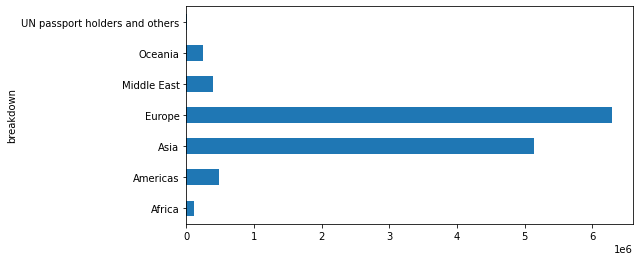

In [45]:
#Checking where the volumne of tourists come from
df_viz.groupby(['breakdown'])['number of tourists'].agg("sum").plot.barh(x="breakdown",y="number of tourists")

<AxesSubplot:xlabel='year'>

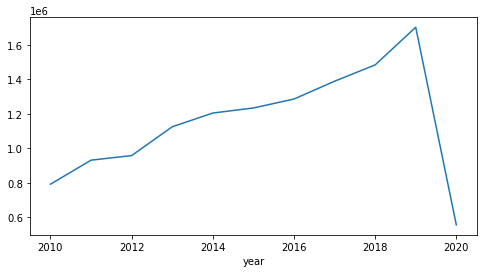

In [46]:
#How number of tourists have changed through years : Line chart
df_viz.groupby(['year'])['number of tourists'].agg("sum").plot.line(x="breakdown",y="number of tourists")

<AxesSubplot:xlabel='year', ylabel='number of tourists'>

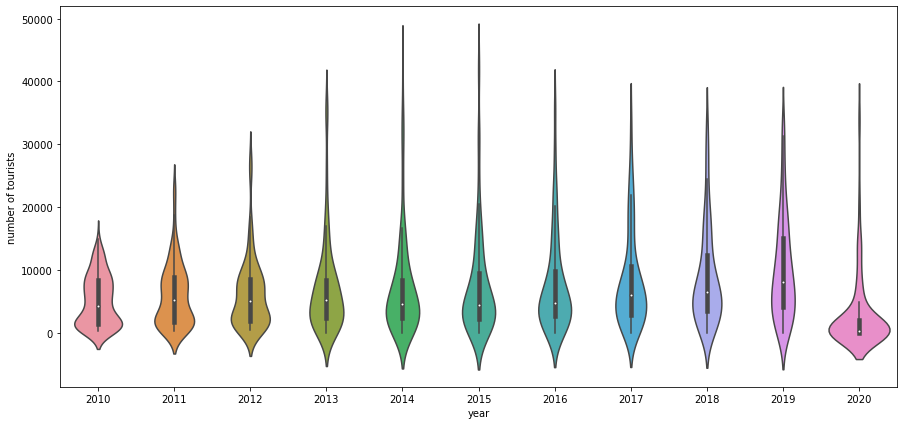

In [47]:
#Distribution of number of tourists by years: Violin Plot: Tells us the mean, ditribution as well as density
fig,ax=plt.subplots()
fig.set_size_inches(15,7)
sns.violinplot(data=df_viz,
            x="year",y="number of tourists")

In [48]:
df_viz

,month,breakdown,country,number of tourists,year
15,Jan-10,Europe,Germany,5890.0,2010
16,Jan-10,Europe,Italy,12276.0,2010
17,Jan-10,Europe,Russia,5873.0,2010
18,Jan-10,Europe,United Kingdom,8405.0,2010
19,Jan-10,Asia,China,6069.0,2010
...,...,...,...,...,...
875,Dec-20,Africa,Unknown,1996.0,2020
876,Dec-20,Americas,Unknown,1924.0,2020
877,Dec-20,Oceania,Unknown,121.0,2020
878,Dec-20,Middle East,Unknown,4557.0,2020


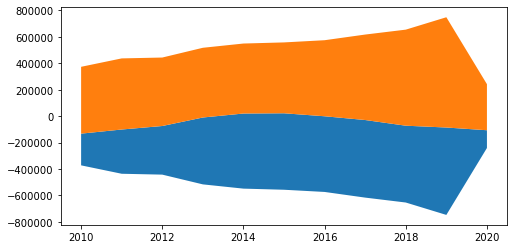

In [49]:
# Attempt to make a stream graph
x=range(2010,2021)
asia_plot=df_viz[df_viz['breakdown']=='Asia'].groupby('year',as_index=False)['number of tourists'].agg('sum').iloc[:,1]
europe_plot=df_viz[df_viz['breakdown']=='Europe'].groupby('year',as_index=False)['number of tourists'].agg('sum').iloc[:,1]
plt.stackplot(x,asia_plot,europe_plot,
             labels=['Asia','Europe'],baseline="sym")

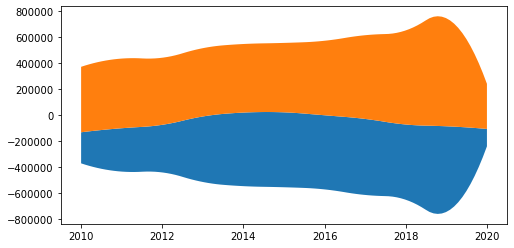

In [50]:
#Stream Graph Attempt 2
from scipy.interpolate import make_interp_spline
tnew = np.linspace(2010, 2020, num=100, endpoint=True)
f = make_interp_spline(x, asia_plot, k=2)
y1Smooth = f(tnew)

f = make_interp_spline(x, europe_plot, k=2)
y2Smooth = f(tnew)

plt.stackplot(tnew, y1Smooth, y2Smooth, labels=['Asia','Europe'], baseline='sym')

In [51]:
#Pivoting the dataframe, tranforming continents to columns for data viz ease (Not used though)
df_viz_pvt=df_viz.pivot_table(index="year",columns='breakdown',values='number of tourists',aggfunc='sum')
df_viz_pvt

breakdown,Africa,Americas,Asia,Europe,Middle East,Oceania,UN passport holders and others
year,,,,,,,
2010,5628.0,18601.0,239882.0,505421.0,11629.0,10756.0,NaN
2011,6452.0,23654.0,334692.0,537769.0,14570.0,14196.0,NaN
2012,7095.0,26774.0,367680.0,517809.0,21843.0,16826.0,NaN
2013,8271.0,32970.0,505753.0,527274.0,32050.0,18761.0,123.0
2014,8149.0,41044.0,568031.0,529291.0,37201.0,20814.0,327.0
2015,9248.0,46630.0,578322.0,535962.0,41976.0,21777.0,333.0
2016,10752.0,50458.0,572336.0,575176.0,51330.0,25708.0,375.0
2017,14678.0,61972.0,586791.0,646363.0,49193.0,30308.0,237.0
2018,15354.0,68764.0,580928.0,726420.0,52114.0,40510.0,184.0


<AxesSubplot:xlabel='breakdown', ylabel='year'>

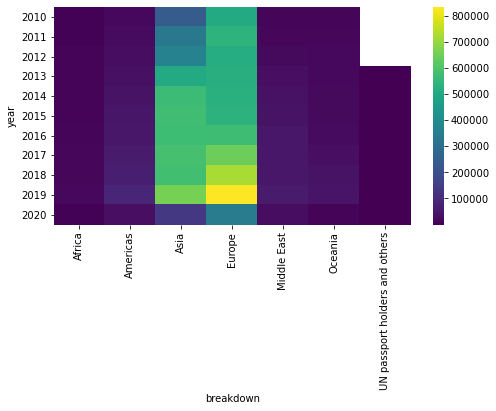

In [52]:
#Heat Map: Distribution by year and continent
sns.heatmap(df_viz_pvt, cmap='viridis')

#### AGGREGATED DATA BY CONTINENT & YEAR

In [53]:
#Aggregate data by continent and year for data viz and YOY calculations for each continent
df_viz_contyear=df_viz.groupby(['breakdown','year'],as_index=False)['number of tourists'].agg('sum')
df_viz_contyear

,breakdown,year,number of tourists
0,Africa,2010,5628.0
1,Africa,2011,6452.0
2,Africa,2012,7095.0
3,Africa,2013,8271.0
4,Africa,2014,8149.0
...,...,...,...
69,UN passport holders and others,2016,375.0
70,UN passport holders and others,2017,237.0
71,UN passport holders and others,2018,184.0
72,UN passport holders and others,2019,316.0


In [54]:
#Making a custom dict to sort the data by the below order
#WHY? Because Facet Grid takes the order of dataframe to plot graphs and we need the order from maximum YOY% to minimum YOY%
#This order has been taken from YOY% dataframe
custom_dict = {'Oceania':0,
 'Asia':1,
 'UN passport holder and others':2,
 'Africa':3,
 'Americas':4,
 'Europe':5,
 'Middle East':6}

In [55]:
#Custom Sorting
df_viz_contyear.sort_values(by=['breakdown','year'], key=lambda x: x.map(custom_dict),inplace=True)
df_viz_contyear

,breakdown,year,number of tourists
55,Oceania,2010,10756.0
56,Oceania,2011,14196.0
57,Oceania,2012,16826.0
58,Oceania,2013,18761.0
59,Oceania,2014,20814.0
...,...,...,...
69,UN passport holders and others,2016,375.0
70,UN passport holders and others,2017,237.0
71,UN passport holders and others,2018,184.0
72,UN passport holders and others,2019,316.0


In [56]:
#Removing UN Passport Countries as that won't be the focus for Viz
df_viz_contyear=df_viz_contyear[~df_viz_contyear['breakdown'].str.contains('UN passport')]

#### YOY % CHANGE

In [57]:
df_viz_yoy = df_viz_contyear.copy()

In [58]:
df_viz_yoy['YOY'] = df_viz_yoy['number of tourists'].shift(1)
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY
55,Oceania,2010,10756.0,NaN
56,Oceania,2011,14196.0,10756.0
57,Oceania,2012,16826.0,14196.0
58,Oceania,2013,18761.0,16826.0
59,Oceania,2014,20814.0,18761.0


In [59]:
df_viz_yoy['YOY%'] = ( (df_viz_yoy['number of tourists'] - df_viz_yoy['YOY'])/df_viz_yoy['YOY'] )*100
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY,YOY%
55,Oceania,2010,10756.0,NaN,NaN
56,Oceania,2011,14196.0,10756.0,31.982149
57,Oceania,2012,16826.0,14196.0,18.526345
58,Oceania,2013,18761.0,16826.0,11.500059
59,Oceania,2014,20814.0,18761.0,10.942913


In [60]:
df_viz_yoy['YOY%']=df_viz_yoy['YOY%'].round(2)
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY,YOY%
55,Oceania,2010,10756.0,NaN,NaN
56,Oceania,2011,14196.0,10756.0,31.98
57,Oceania,2012,16826.0,14196.0,18.53
58,Oceania,2013,18761.0,16826.0,11.50
59,Oceania,2014,20814.0,18761.0,10.94


In [61]:
df_viz_yoy.year=df_viz_yoy.year.astype(str)

In [62]:
df_viz_yoy=df_viz_yoy[df_viz_yoy['year']=="2020"]
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY,YOY%
65,Oceania,2020,7964.0,44140.0,-81.96
32,Asia,2020,134279.0,661000.0,-79.69
10,Africa,2020,6458.0,18695.0,-65.46
21,Americas,2020,32060.0,84794.0,-62.19
43,Europe,2020,348349.0,833939.0,-58.23


In [63]:
df_viz_yoy.reset_index(drop=True,inplace=True)
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY,YOY%
0,Oceania,2020,7964.0,44140.0,-81.96
1,Asia,2020,134279.0,661000.0,-79.69
2,Africa,2020,6458.0,18695.0,-65.46
3,Americas,2020,32060.0,84794.0,-62.19
4,Europe,2020,348349.0,833939.0,-58.23


In [64]:
df_viz_yoy.sort_values(by=['YOY%'],inplace=True)
df_viz_yoy.head()

,breakdown,year,number of tourists,YOY,YOY%
0,Oceania,2020,7964.0,44140.0,-81.96
1,Asia,2020,134279.0,661000.0,-79.69
2,Africa,2020,6458.0,18695.0,-65.46
3,Americas,2020,32060.0,84794.0,-62.19
4,Europe,2020,348349.0,833939.0,-58.23


In [65]:
YOYP_list=df_viz_yoy['YOY%'].tolist()
YOYP_list

[-81.96, -79.69, -65.46, -62.19, -58.23, -56.19]

In [66]:
continent_list=df_viz_yoy['breakdown'].str.upper().tolist()
continent_list

['OCEANIA', 'ASIA', 'AFRICA', 'AMERICAS', 'EUROPE', 'MIDDLE EAST']

In [67]:
#List of Styles available in matplotlib
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [68]:
#List of Font Families available
import matplotlib
[f.name for f in matplotlib.font_manager.fontManager.afmlist]

['New Century Schoolbook',
 'Palatino',
 'Utopia',
 'Helvetica',
 'ITC Bookman',
 'Helvetica',
 'Palatino',
 'Times',
 'Helvetica',
 'ZapfDingbats',
 'New Century Schoolbook',
 'Computer Modern',
 'ITC Zapf Chancery',
 'ITC Avant Garde Gothic',
 'Utopia',
 'Symbol',
 'Courier',
 'Times',
 'Utopia',
 'Palatino',
 'Times',
 'Helvetica',
 'Helvetica',
 'Courier',
 'Symbol',
 'ITC Bookman',
 'Computer Modern',
 'Helvetica',
 'Times',
 'Palatino',
 'Courier',
 'Utopia',
 'Helvetica',
 'Computer Modern',
 'Helvetica',
 'New Century Schoolbook',
 'Courier',
 'ITC Avant Garde Gothic',
 'ITC Avant Garde Gothic',
 'Courier',
 'Courier',
 'ITC Avant Garde Gothic',
 'Helvetica',
 'Times',
 'Times',
 'Helvetica',
 'ITC Bookman',
 'Courier',
 'Helvetica',
 'Times',
 'Helvetica',
 'New Century Schoolbook',
 'Times',
 'Computer Modern',
 'ITC Bookman',
 'Courier',
 'Helvetica',
 'ITC Zapf Dingbats',
 'Computer Modern',
 'Helvetica']

In [69]:
#Global Settings: Applies to every chart
plt.rcParams["font.family"] = "Times New Roman"

In [70]:
#reset properties of seaborn
sns.set()

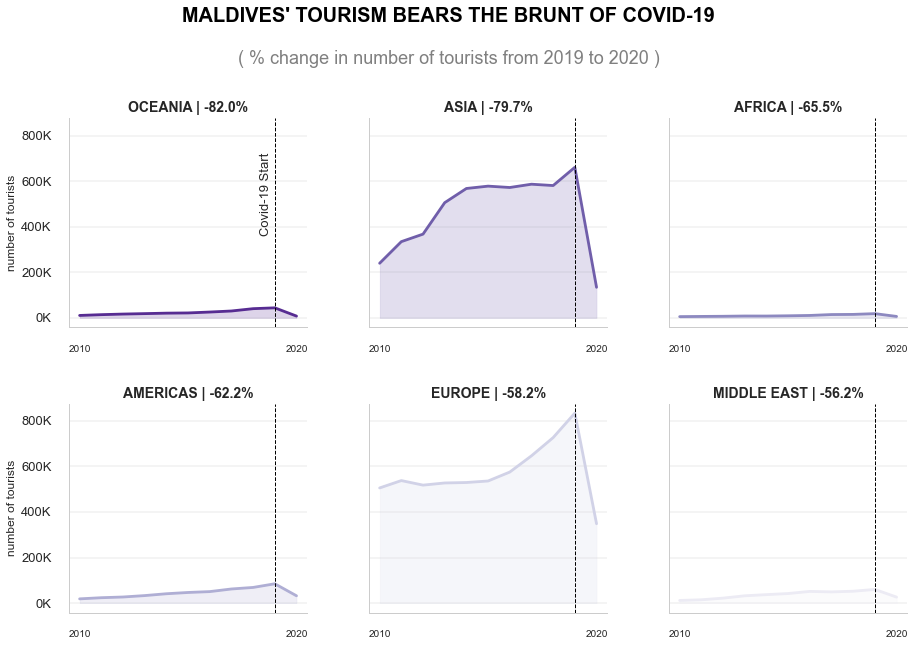

In [80]:
#Convert year to string as it will be plotted as X-axis
df_viz_contyear['year']=df_viz_contyear['year'].astype(str)

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot') #Enhances the charts

#Choose style and don't show grid lines
sns.set_style("whitegrid",{'axes.grid' : False})

#Make facetgrids: Auto multiple charts by categories

'''
Parameters of FacetGrid: 
#Color coding: Add "_r" at end of palettes to reverse the color coding
col_wrap: How many charts in one row
size: Size of each chart: Size will change the height, while maintaining the aspect ratio (so it will also also get wider if only size is changed.)
sharex=False: Don't keep the x axis same for all charts
aspect: How much proportion width should be w.r.t to height
Eg: if height is 80 and aspect is 1.2 then width of chart will be 80*1.2
Official Ex: Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.
'''

g=sns.FacetGrid(df_viz_contyear,col="breakdown",hue='breakdown',palette='Purples_r',
                col_wrap=3,size=4,aspect=1.1,sharex=False)

#Line Chart
g.map(plt.plot,"year","number of tourists")

#Area Chart
g.map(plt.fill_between,"year","number of tourists",alpha=0.2)

#Spacing/Padding between charts
g.fig.tight_layout(h_pad=3,w_pad=5)


#Setting x tick labels: At position 0 and 10 show 2010 and 2020
g.set(xticks=[0,10], xticklabels=[2010, 2020])
g.set_xticklabels(size = 10)

#Function to format y axis tick labels: Takes as input value,position
#Note: We don't really do anything with position

def y_fmt(x,y):
    return '{:,.0f}'.format(x/1000) + 'K'

k=0

#Loop to go through each chart
for ax in g.axes:
    #Make Reference line
    ax.axvline(9,ls="--",color='black',linewidth=1)
    
    #Don't show any labels: As we're only showing 2010 and 2020 and it has been set before
    ax.set(xlabel=None)
    
    #We disbaled grids at the start, so only enabling Y grid as we don't need X grid(vertical grids)
    ax.yaxis.grid(True,linewidth=0.4)
    
    #Set custom colors: Not using
    #ax.set_color(colors[k])
    
    #Font size of yticks labels
    ax.set_yticklabels(ax.get_yticks(),fontsize=13)
    
    #Format y tick labels: make them in Ks
    ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt),)
    
    #Custom dynamic title of every chart
    ax.set_title(continent_list[k]+" | "+'{:,.1f}'.format(YOYP_list[k])+"%",size=14,weight="bold")
    
    #Show Tick marks
    #https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html
    
    k=k+1
    
#Show 2019 just after reference line ONLY in first chart
#https://stackoverflow.com/questions/13413112/creating-labels-where-line-appears-in-matplotlib-figure
g.axes[0].text(8.3,0.45,'Covid-19 Start',rotation=90,transform=g.axes[0].get_xaxis_transform(),size=13)

#Main Title: Top right most position is 1,1. Changing Y adds padding of titles with charts
g.fig.suptitle("MALDIVES' TOURISM BEARS THE BRUNT OF COVID-19",size=20,y=1.15,weight='bold',color="black",)

#Sub Title Hack: Position of sub title has been done by custom x and y
plt.figtext(0.5, 1.06, '( % change in number of tourists from 2019 to 2020 )', ha='center', va='center',
          size=18,color="gray")

#Saving plot as svg file
# bbox_inches='tight': Without this, the titles won't come in the saved file. dpi is for high resolution
plt.savefig('W12.svg',format='svg', dpi=1200,bbox_inches='tight' )

#plt.show() should come after plt.savefig()
#Explanation: plt.show() clears the whole thing, so anything afterwards will happen on a new empty figure

plt.show()

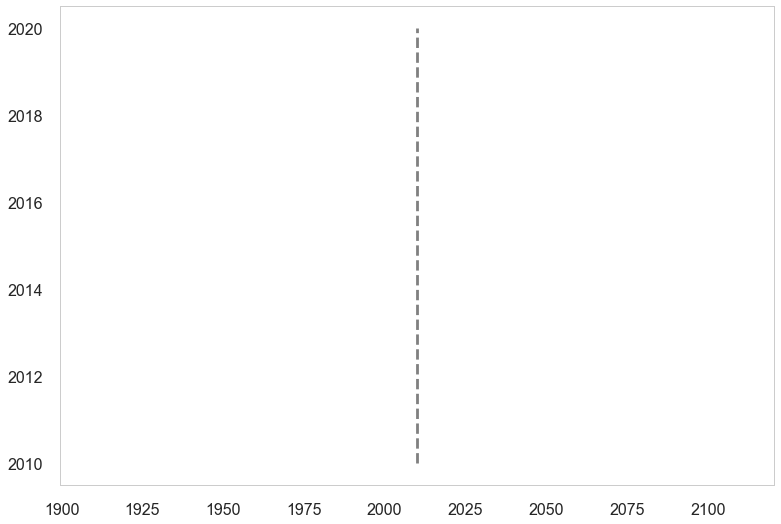

In [72]:
#Attempt to make a reference line
plt.plot((2010,2010),(2010,2020),c="gray",ls="--") #(x1,x2) (y1,y2)

In [73]:
#Exploring content of g.axes(multiple charts in the facetgrid)
g.axes

array([<AxesSubplot:title={'center':'OCEANIA | -82.0%'}, ylabel='number of tourists'>,
       <AxesSubplot:title={'center':'ASIA | -79.7%'}>,
       <AxesSubplot:title={'center':'AFRICA | -65.5%'}>,
       <AxesSubplot:title={'center':'AMERICAS | -62.2%'}, ylabel='number of tourists'>,
       <AxesSubplot:title={'center':'EUROPE | -58.2%'}>,
       <AxesSubplot:title={'center':'MIDDLE EAST | -56.2%'}>],
      dtype=object)

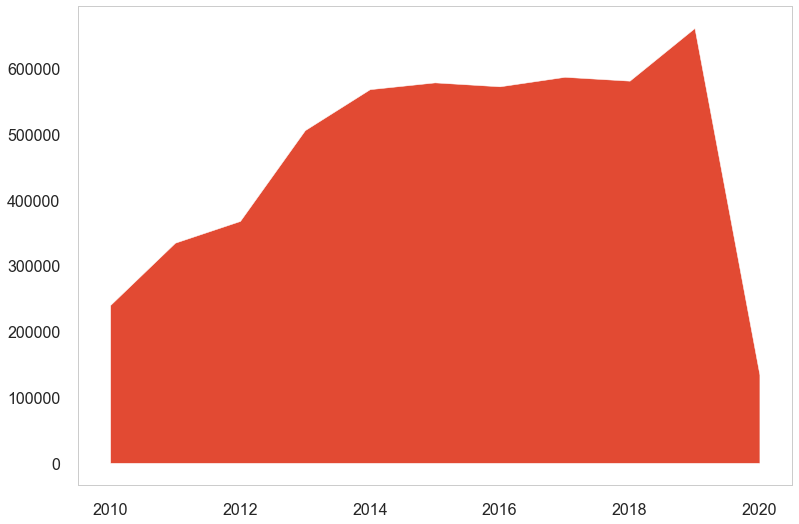

In [74]:
#Area Chart: Number of tourists in Asia by Year
plt.fill_between(x,asia_plot)

<AxesSubplot:xlabel='year', ylabel='number of tourists'>

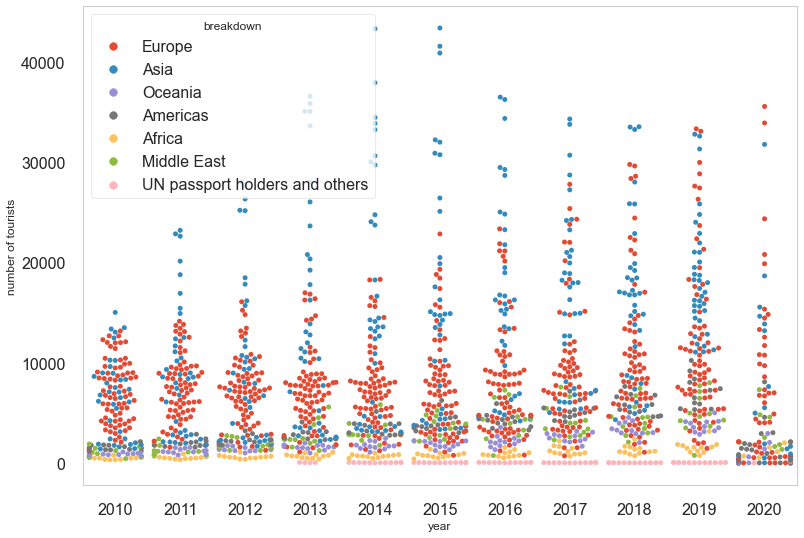

In [75]:
#Swarm Plot: Number of tourists by country & year
sns.swarmplot(data=df_viz,y='number of tourists',x='year',hue='breakdown')